# Imbalanced classes — pre-processing



[1]:http://vcmi.inescporto.pt/reproducible_research/ijcnn2016/ClassImbalance/imbalance.pdf

In [2]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import combinations
from imblearn.datasets import make_imbalance

from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

# Define a function for plotting data.
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.5)
    plt.show()

## Example problem

Below (following the example shown in the introduction) an imblanced classification problem is produced using the cresent moon dataset generator from *sklean* and the routines from *imblearn* that take a dataset and make it imbalanced.

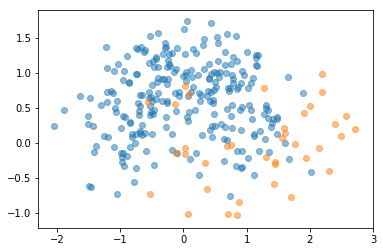

In [17]:
# Based on the imbalance_learn package examples
X, y = make_moons(n_samples=500, shuffle=True, noise=0.4, random_state=40)
X_, y_ = make_imbalance(X, y, ratio=0.15, min_c_=1, random_state=40)

plot_data(X_, y_)

The data can be split into training and test sets and then a linear support vector machine fitted. F1-score can then be used to look at the efficacy of the model.

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=40, stratify=y_)

# Define and fit model
model = SVC(random_state=40, probability=True)
model.fit(X_train, y_train)

# Make predicts
y_predict = model.predict(X_test)

# Output the precision, recall and f1-score
print classification_report(y_true=y_test, y_pred=y_predict)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        83
          1       0.67      0.33      0.44        12

avg / total       0.88      0.89      0.88        95



## Meta Cost

Domingos introduced MetaCost <sup>[1]</sup>

[1]:https://homes.cs.washington.edu/~pedrod/papers/kdd99.pdf

In [19]:
c01_c10 = (y_==0).sum() / (y_==1).sum()

threshold = 1 / (1 + c01_c10)

def make_prediction(data, model, threshold):
    probs = model.predict_proba(data)
    return [1 if prob[1] > threshold else 0 for prob in probs]

In [20]:
y_new = make_prediction(X_train, model, threshold)

# Define and fit model
model = SVC(random_state=40, probability=True)
model.fit(X_train, y_new)

# Make predicts
y_predict = model.predict(X_test)

# Output the precision, recall and f1-score
print classification_report(y_true=y_test, y_pred=y_predict)

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        83
          1       0.58      0.58      0.58        12

avg / total       0.89      0.89      0.89        95



In [42]:
from imblearn.ensemble import EasyEnsemble

ee = EasyEnsemble()

X_samp, y_samp = ee.fit_sample(X_train, y_train)

models = []

print (y_train==0).sum()/(y_train==1).sum()

for x in xrange(0,10):
    print (y_samp[x]==0).sum()/(y_samp[x]==1).sum()
    model = model.fit(X_samp[x], y_samp[x])
    models.append(model)


6.68
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit()

models = []
for x in sss.split(X_train, y_train):
    X_samp = X_train[x[0]]
    y_samp = y_train[x[0]]
    print (y_samp==1).sum()/(y_samp==0).sum()
    model = model.fit(X_samp, y_samp)
    

0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
0.146666666667
